# Lev Kozlov

# configuration XYZYX

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# set numpy print precision 
np.set_printoptions(precision=3)

In [2]:
# basic functions

def Rz(theta, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0],
                          [sp.sin(theta), sp.cos(theta), 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])

    return np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                     [np.sin(theta), np.cos(theta), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]]).astype(np.float64)


def Ry(theta, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[sp.cos(theta), 0, sp.sin(theta), 0],
                          [0, 1, 0, 0],
                          [-sp.sin(theta), 0, sp.cos(theta), 0],
                          [0, 0, 0, 1]])
    return np.array([[np.cos(theta), 0, np.sin(theta), 0],
                     [0, 1, 0, 0],
                     [-np.sin(theta), 0, np.cos(theta), 0],
                     [0, 0, 0, 1]]).astype(np.float64)


def Rx(theta, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, 0],
                          [0, sp.cos(theta), -sp.sin(theta), 0],
                          [0, sp.sin(theta), sp.cos(theta), 0],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(theta), -np.sin(theta), 0],
                     [0, np.sin(theta), np.cos(theta), 0],
                     [0, 0, 0, 1]]).astype(np.float64)


def Tx(x, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, x],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, x],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])


def Ty(y, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, 0],
                          [0, 1, 0, y],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, y],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])


def Tz(z, s=False):
    if s:
        # return symbolic version
        return sp.Matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, 1, z],
                          [0, 0, 0, 1]])
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, z],
                     [0, 0, 0, 1]])


# Forward kinematics derivation

Links parameters are took from urdf - 0.5m each link (*l1*, *l2*, *l3*)

### Links assignment

<img src="assets/frames.jpg" height=500 />

### Kinematics derivation

$$T = T_1^0 \cdot T_2^1 \cdot T_3^2 \cdot T_4^3 \cdot T_5^4$$

$$ T_1^0 = T_x(d_0) $$
$$ T_2^1 = T_y(d_1) $$
$$ T_3^2 = T_z(l_1) \cdot R_z(q_2) $$
$$ T_4^3 = T_z(l_2) \cdot R_y(q_3 - \frac{\pi}{2}) $$
$$ T_5^4 = T_x(l_3) \cdot R_x(q_4) $$

In [3]:
# forward kinematics

# we have to define 4 links, for simplicity we will use the same length for all of them (0.5m)

l1 = 0.5
l2 = 0.5
l3 = 0.5


def fk(q, s=False):
    return fk_i(q, -1, s)


def fk_i(q, i, s=False):
    # returns transformation for i-th frame
    if i == -1:
        i = 5
    if s:
        transform = sp.eye(4)
    else:
        transform = np.eye(4)

    transforms = [
        transform,
        Tx(q[0], s),
        Ty(q[1], s),
        Tz(l1, s) @ Rz(q[2], s),
        Tz(l2, s) @ Ry(q[3] - np.pi / 2, s),
        Tx(l3, s) @ Rx(q[4], s),
    ]

    for j in range(i + 1):
        transform = transform @ transforms[j]

    return transform


def t2pos(t):
    return t[:3, 3]


def t2rot(t):
    return t[:3, :3]


In [4]:
# example of zero configuration

t = sp.symbols('t')

# create symbolic version of joints
q0 = sp.Function('q0')(t)
q1 = sp.Function('q1')(t)
q2 = sp.Function('q2')(t)
q3 = sp.Function('q3')(t)
q4 = sp.Function('q4')(t)

q_s = [q0, q1, q2, q3, q4]

T = fk(q_s, s=True)

# # rotation
# print(sp.latex(T[:3, :3]))

# # position
# print(sp.latex(T[:3, 3]))


$$R(\vec{q}) = \left[\begin{matrix}1.0 \cos{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \cos{\left(q_{2}{\left(t \right)} \right)} & 1.0 \sin{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \sin{\left(q_{4}{\left(t \right)} \right)} \cos{\left(q_{2}{\left(t \right)} \right)} - 1.0 \sin{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} & 1.0 \sin{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \cos{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} + 1.0 \sin{\left(q_{2}{\left(t \right)} \right)} \sin{\left(q_{4}{\left(t \right)} \right)}\\1.0 \sin{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} & 1.0 \sin{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \sin{\left(q_{2}{\left(t \right)} \right)} \sin{\left(q_{4}{\left(t \right)} \right)} + 1.0 \cos{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} & 1.0 \sin{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \sin{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{4}{\left(t \right)} \right)} - 1.0 \sin{\left(q_{4}{\left(t \right)} \right)} \cos{\left(q_{2}{\left(t \right)} \right)}\\- 1.0 \sin{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} & 1.0 \sin{\left(q_{4}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} & 1.0 \cos{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \cos{\left(q_{4}{\left(t \right)} \right)}\end{matrix}\right]$$

$$P(\vec{q}) = \left[\begin{matrix}1.0 q_{0}{\left(t \right)} + 1.0 \cos{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)} \cos{\left(q_{2}{\left(t \right)} \right)}\\1.0 q_{1}{\left(t \right)} + 1.0 \sin{\left(q_{2}{\left(t \right)} \right)} \cos{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)}\\2.0 - 1.0 \sin{\left(q_{3}{\left(t \right)} - 1.5707963267949 \right)}\end{matrix}\right]$$

In [5]:
# evaluate forward kinematics for zero configuration

q = np.zeros(5)

T = fk(q)

T


array([[ 6.123e-17,  0.000e+00, -1.000e+00,  3.062e-17],
       [ 0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00],
       [ 1.000e+00,  0.000e+00,  6.123e-17,  1.500e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])

As expected we see that Z coordinate is 3, as there are 3 links by 1 meter, and it is stretched up

# Jacobian derivation

For my solution I decidede to use geometric approach for jacobian.

That means I fill each column according to the type of joint, in my case first 2 are prismatic, others are revolute.

For prismatic $$J_i = \left[\begin{matrix}z_{i-1}\\0\end{matrix}\right]$$

For revolute $$J_i = \left[\begin{matrix}z_{i-1}\\z_{i-1} \times (p_5 - p_{i-1})\end{matrix}\right]$$

Where $z_i$ is actually $z_i(q)$ - rotation axis of joint and will depend on current configuration and axis of actuation. 

In [6]:
def jacobian_i(q, i, prism=False):
    # i in range 0-5
    axis = [
        sp.Array([[1], [0], [0]]),  # prismatic X
        sp.Array([[0], [1], [0]]),  # prismatic Y
        sp.Array([[0], [0], [1]]),  # revolute Z
        sp.Array([[0], [1], [0]]),  # revolute Y
        sp.Array([[1], [0], [0]]),  # revolute X
    ]
    # computes column of jacobian for i-th frame, output is 6x1 matrix

    rot = t2rot(fk_i(q, i, True))   # get rotation matrix of current frame

    res = rot @ axis[i]  # get axis of current frame

    pe = t2pos(fk(q, True))  # get position of end effector
    pi = t2pos(fk_i(q, i, True))  # get position of current frame

    dp = pe - pi

    joint_axis = res
    res = res.cross(dp)

    if not prism:
        return sp.Array([res[0], res[1], res[2], joint_axis[0], joint_axis[1], joint_axis[2]])
    else:
        return sp.Array([joint_axis[0], joint_axis[1], joint_axis[2], 0, 0, 0])


def jacobian(q):
    res = [[], [], [], [], []]
    for i in range(5):
        # haha, just first two joints are prismatic, deal with it
        res[i] = jacobian_i(q, i, prism=i < 2)

    return sp.Matrix(res).T


In [7]:
# compute jacobian for i-th frame
J = jacobian(q_s)

J

Matrix([
[1, 0, -0.5*sin(q2(t))*cos(q3(t) - 1.5707963267949),                                              (0.5 - 0.5*sin(q3(t) - 1.5707963267949))*cos(q2(t)),                                       0],
[0, 1,  0.5*cos(q3(t) - 1.5707963267949)*cos(q2(t)),                                              (0.5 - 0.5*sin(q3(t) - 1.5707963267949))*sin(q2(t)),                                       0],
[0, 0,                                            0, -0.5*sin(q2(t))**2*cos(q3(t) - 1.5707963267949) - 0.5*cos(q3(t) - 1.5707963267949)*cos(q2(t))**2,                                       0],
[0, 0,                                            0,                                                                                      -sin(q2(t)), cos(q3(t) - 1.5707963267949)*cos(q2(t))],
[0, 0,                                            0,                                                                                       cos(q2(t)), sin(q2(t))*cos(q3(t) - 1.5707963267949)],
[0, 0,                    

In [8]:
# show jacobian for zero configuration
J.subs({q0: 0, q1: 0, q2: 0, q3: 0, q4: 0})

Matrix([
[1, 0,                    0,                   1.0,                    0],
[0, 1, 3.06161699786838e-17,                     0,                    0],
[0, 0,                    0, -3.06161699786838e-17,                    0],
[0, 0,                    0,                     0, 6.12323399573677e-17],
[0, 0,                    0,                     1,                    0],
[0, 0,                    1,                     0,                  1.0]])

# Analysis of jacobian to obtain to obtain zero (linear) velocity of the end effector

$$ J(q) \vec{\dot{q}} = \vec{v} $$

As we ask for nullspace only for translatory part, what it means actually is:
which joint velocities could be chosen to keep the end effector in the same position

In [9]:
# get only translation part of jacobian
translatory = J[:3, :]

# find its nullspace
nullspace = translatory.nullspace()

nullspace

[Matrix([
 [ 0.5*sin(q2(t))*cos(q3(t) - 1.5707963267949)],
 [-0.5*cos(q3(t) - 1.5707963267949)*cos(q2(t))],
 [                                           1],
 [                                           0],
 [                                           0]]),
 Matrix([
 [0],
 [0],
 [0],
 [0],
 [1]])]

We can observe that there null space consists of basis of 2 vectors and every linear combination of them is a solution:

1. At any moment we can rotate the last joint and it will product zero (linear) velocity in the end effector
2. There is some combination of joint velocities dependent on current configuration which also can result in zero velocity in the end effector

In [10]:
# get null basis
basis = nullspace[0]

# try to multiply jacobian by basis
J @ basis


Matrix([
[0],
[0],
[0],
[0],
[0],
[1]])

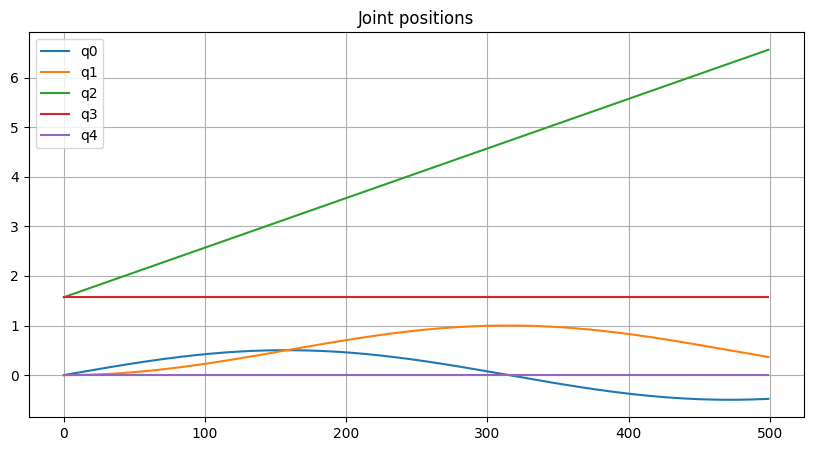

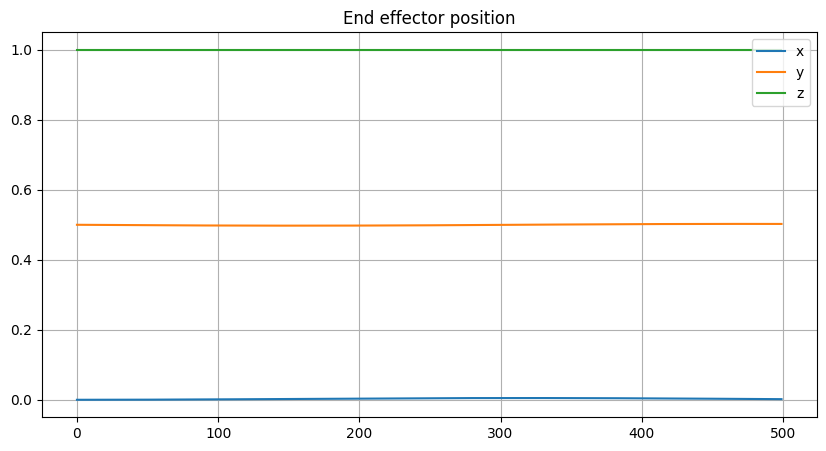

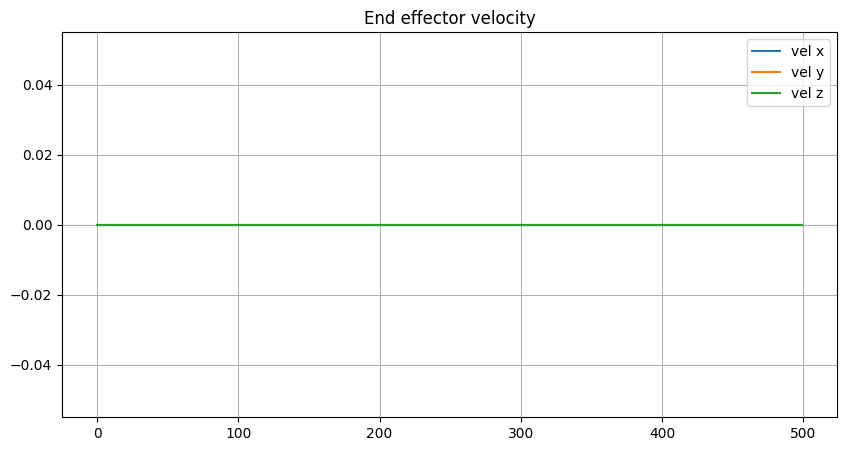

In [11]:
# let start configuration be [0, 0, pi/2, pi/2, 0]
q = np.array([0, 0, np.pi / 2, np.pi / 2, 0]).astype(np.float64)

dt = 0.01

history_q = []
history_pos = []
history_vel = []

# we try to kind of simulate 1 seconds with step dt
for i in range(500):
    history_q.append(q)
    # evaluate jacobian for start configuration
    j0 = J.subs({q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

    # evaluate dq for start configuration from basis
    dq = basis.subs({q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

    cartesian_vel = j0 @ dq
    history_vel.append(cartesian_vel)

    change = np.array(dq * dt).flatten().astype(np.float64)

    q = q + change

    history_pos.append(t2pos(fk(q)))

history_q = np.array(history_q)
history_pos = np.array(history_pos)
history_vel = np.array(history_vel)

# plot joint positions
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('Joint positions')
plt.plot(history_q[:, 0], label='q0')
plt.plot(history_q[:, 1], label='q1')
plt.plot(history_q[:, 2], label='q2')
plt.plot(history_q[:, 3], label='q3')
plt.plot(history_q[:, 4], label='q4')
plt.legend()

# plot end effector position
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('End effector position')
plt.plot(history_pos[:, 0], label='x')
plt.plot(history_pos[:, 1], label='y')
plt.plot(history_pos[:, 2], label='z')
plt.legend()

# plot end effector velocity
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('End effector velocity')
plt.plot(history_vel[:, 0], label='vel x')
plt.plot(history_vel[:, 1], label='vel y')
plt.plot(history_vel[:, 2], label='vel z')
plt.legend()

# Example with standing (x, y, z) using one basis from nullspace

![Alt text](https://github.com/lvjonok/f22-fundamentals-of-robotics/blob/master/assignment2/assets/demo.gif)

# Analysis of null space of jacobian

Actually there is no null space, as we see from sympy derivation. That means we cannot achieve complete zero velocity of the end effector (both rotational and translational) along all axes. We can only achieve zero velocity along some axes, but not all of them.

In [12]:
# find null space of symbolic jacobian
null_space = J.nullspace()

# print null space
null_space

[]

# Analysis of left null space of Jacobian

If we multiply transpose of Jacobian by its null space, we can find what will be effect on joint configuration. We can see that it is zero, as we expect. That means which ever desired $$d\vec{r}$$ we choose, it will not affect joint configuration.

some link that helped me to get the idea and interpretation of left null space:
[some tutorial](http://boris-belousov.net/2016/07/29/jacobians/)

But actually this idea is given more academically in this book:
Siciliano - 2009 - Robotics modelling, planning and control

It is referred as Jacobian transpose method and used as computationally efficient way to solve inverse kinematics problem.

## Shorter meaning of the method

Finding left null space of jacobian is equivalent to finding the null space of its transpose.
For this method that means that at some desired $$d\vec{r}$$ we could end up with algorithm stuck because joint velocities would be zero.

In [13]:
# find left null space of jacobian
left_null_space = J.T.nullspace()

# print left null space
left_null_space

[Matrix([
 [                                            0],
 [                                            0],
 [2.0/(cos(q3(t) - 1.5707963267949)*cos(q2(t)))],
 [                       -sin(q2(t))/cos(q2(t))],
 [                                            1],
 [                                            0]])]

In [14]:
qnull = J.T @ left_null_space[0]

qnull.simplify()

qnull


Matrix([
[0],
[0],
[0],
[0],
[0]])

## The following is the example of the method 'stuck' in the null space

According to the book: 

Velocity: $$\dot{V} = e^{T}K\dot{x_d} - e^{T}KJ_a(q)J_a(q)^{T}Ke$$

When $$\mathcal{N}({J_a(q)^T}) \neq 0$$, velocity is only negative semi-definite, since $$\dot{V} = 0$$ for $$\vec{e} \neq 0$$ with $$Ke \in \mathcal{N}({J_a(q)^T})$$.

In such case algorithm will stuck at $$\dot{\vec{q}} = 0$$, with $$\vec{e} \neq 0$$.

Below is the example of the method stuck in the null space. 

Disclaimer: I showed stuck in convergence to the desired position only, orientation convergence problem is not shown.

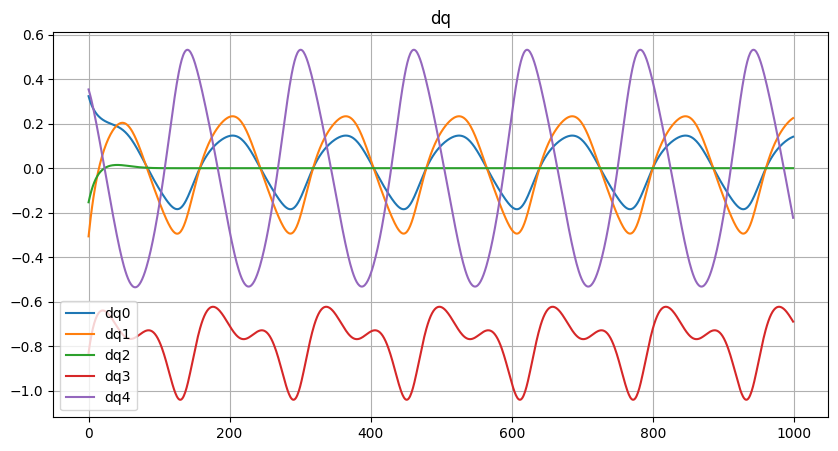

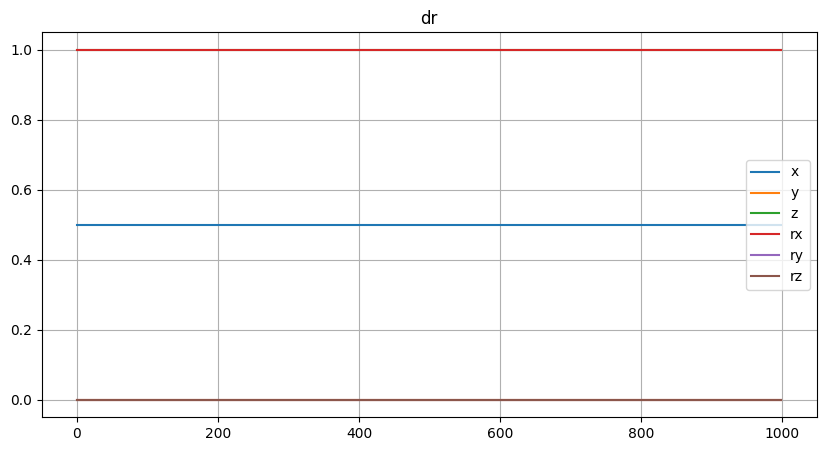

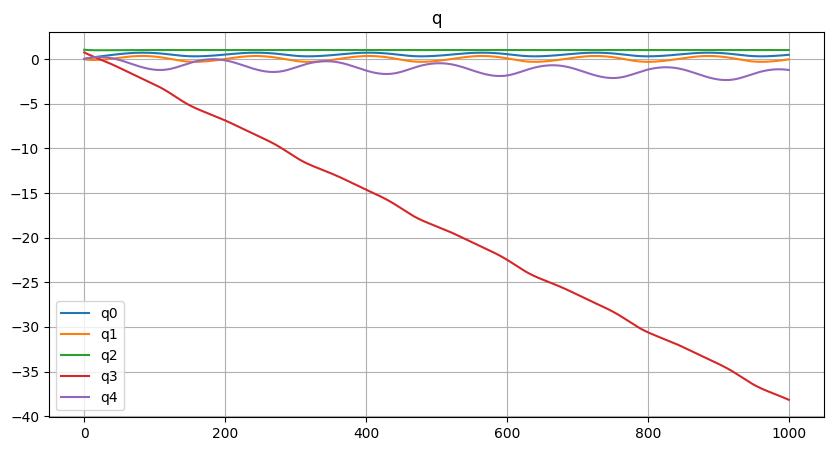

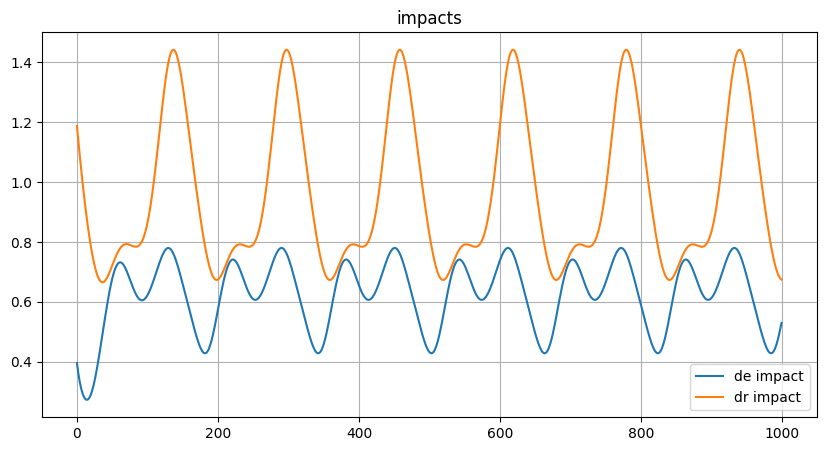

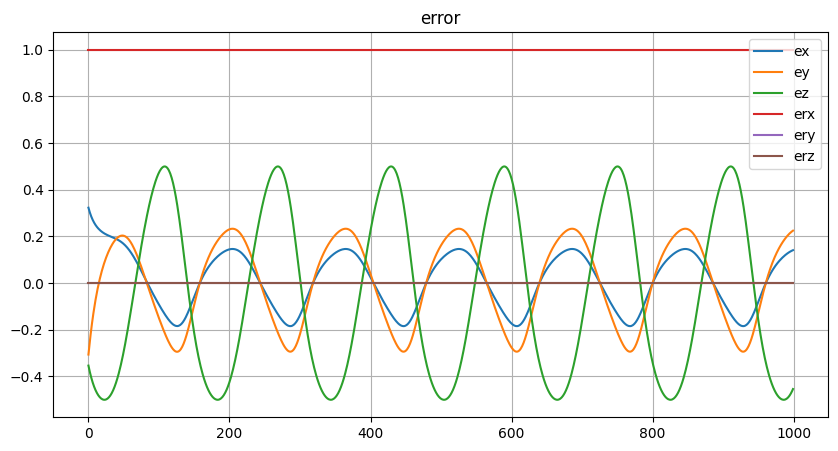

In [17]:
# here is some demo with left null space of jacobian

q = np.array([0, 0, np.pi / 3, np.pi / 4, 0]).astype(np.float64)

dt = 0.05

history_dq = []
history_dr = []
history_q = []
history_deimpact = []
history_drimpact = []
history_error = []

# try to set "impossible to reach" position
dr = left_null_space[0].subs(
    {q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

# multiply dr by some factor, such that z will be 1
dr = dr * (1 / dr[2])
dr[2] = 0.9

dr = sp.Matrix([[0.5], [0], [1], [1], [0], [0]])

# we try to kind of simulate 1 seconds with step dt
for i in range(1000):
    # eval transpose of jacobian
    jt = J.T.subs({q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})
    # eval left null space
    # dr = left_null_space[0].subs(
    #     {q0: q[0], q1: q[1], q2: q[2], q3: q[3], q4: q[4]})

    # dr = sp.Matrix([[0.1], [0.1], [0], [0], [0], [0]])

    history_dr.append(dr)

    de = t2pos(fk(q, True))
    # add 3 dimensional vector to end effector position
    de = sp.Matrix([[de[0]], [de[1]], [de[2]], [0], [0], [0]])

    drimpact = jt @ dr

    # append norm of drimpact
    history_drimpact.append(
        sp.sqrt(sum(sp.matrices.dense.matrix_multiply_elementwise(drimpact, drimpact))))

    deimpact = jt @ de
    history_deimpact.append(
        sp.sqrt(sum(sp.matrices.dense.matrix_multiply_elementwise(deimpact, deimpact))))

    history_error.append(dr - de)

    # find cartesian velocity
    dq = drimpact - deimpact
    history_dq.append(dq)

    q = q + np.array(dq * dt).flatten().astype(np.float64)
    history_q.append(q)


# plot joint positions
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('dq')
for i in range(5):
    plt.plot([x[i] for x in history_dq], label=f'dq{i}')

plt.legend()

# plot dr history
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('dr')
for i in range(6):
    plt.plot([x[i] for x in history_dr], label=[
             'x', 'y', 'z', 'rx', 'ry', 'rz'][i])

plt.legend()

# plot history of q
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('q')
for i in range(5):
    plt.plot([x[i] for x in history_q], label=f'q{i}')

plt.legend()

# plot impacts
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('impacts')
plt.plot(history_deimpact, label='de impact')
plt.plot(history_drimpact, label='dr impact')
plt.legend()


# plot error
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('error')
for i in range(6):
    plt.plot([x[i] for x in history_error],
             label=f"e{['x', 'y', 'z', 'rx', 'ry', 'rz'][i]}")
plt.legend()
